<a href="https://colab.research.google.com/github/COFAlumni-USB/Physics-REBoot-Applied-Science-Bootcamp/blob/main/Hands%20On/Dia%205/Distribuyendo_Empanadas_Montecarlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

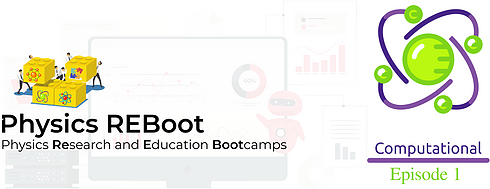

# ***Preambulo***

Primero carguemos los paquetes de Python necesarios para trabajar.

In [1]:
import numpy as np
from tqdm import tqdm 
import matplotlib.pyplot as plt

# **Distribuyendo Empanadas con *Montecarlo***



Recordamos el problema de las empanadas que vimos el segundo día. En ese momento, estudiamos distintos métodos para resolver el problema de estimar la probabilidad de que alguien obtenga una empanada repetida al distribuirlas entre un grupo de personas. Entre las soluciones que exploramos estan:

  * Métodos algebráicos
  * Métodos de fuerza bruta
  * Métodos de grafos
  * ?

Hoy estudiaremos como resolver este problema via Montecarlo.

# **Teoría**

Recordemos brevemente que, en el caso de $N$ personas, existen $2N!$ maneras de distribuir 2 empanadas para cada una. Para $N$ pequeño es posible contar cada caso. Para 7 personas ya existen 1,278,945,280 casos. Un approach de fuerza bruta no es práctico en este caso.

Ya que Montecarlo implica la evaluación de un número grande de múltiples escenarios (menor que el total), existe la posibilidad de que muchos casos favorables (sin repeticiones) y desfavorables se nos escapen.

Sin embargo, es posible evaluar varios escenarios de distribución y estimar el cociente entre los casos favorables y desfavorables. Este valor es constante y dependiente del caso de distribución de empanadas que estamos considerando.

Este cociente esta relacionado con la probabilidad de obtener un caso favorable o desfavorable mediante:

\\


\begin{align}
p(x=F) + p(x=D) &= 1 \\
\frac{F}{T} + \frac{D}{T} &= 1
\end{align} 


\\

Equivalentemente:


\begin{align}
\frac{F}{D} + 1 &= \frac{T}{D} \\
\frac{1}{\frac{F}{D}+1} &= \frac{D}{T}
\end{align}


\\

Recordando, a traves de Montecarlo podemos estimar este cociente a través de:

\begin{align}
\left \langle \frac{F}{D} \right \rangle = \frac{1}{M}\sum_{i=1}^{M} \frac{F_{i}}{D_{i}}
\end{align}
La desviación estándard de este estimador esta dada por:
\begin{align}
 \sigma = \frac{1}{\sqrt{M}}
\end{align}

\\

Debemos empezar entonces creando un código que nos permita generar escenarios...


# Práctica

In [2]:
def samples(n,k,m,nsamples):
    """

    Parameters
    ----------
    n : int
        Numero de personas.
    m : int
        Número de empanadas por persona
    k : int
        Numero de sabores de empanadas.
    nsamples: int
        Numero de samples
        
    Returns
    -------
    Favorables : int
      Numero de casos favorables en la muestra
    Desfavorables : int
      Numero de casos desfavorables en la muestra

    """
    # El numero total de empanadas, para que le toque 2 a cada uno
    N_empanadas = m*n

    # Necesitamos calcular un vector que represente las empanadas para luego distribuirlas. 
    # Ya que son dos empanadas para cada uno deberia producir lo siguiente:  [0,0,1,1,2,2,3,3,4,4,5,5.......,k,k]
    Empanadas = np.array([i for i in range(k) for j in range(m)])

    # Ahora generamos escenarios en los cuales distribuimos al azar las empanadas representadas por el vector previo. 
    # Este proceso lo repetiremos nsamples veces.  Hay muchas maneras de escribir esto
    Samples = [np.random.choice(Empanadas,size =N_empanadas, replace=False)\
               for i in range(nsamples)]

    # Evaluamos cada muestra para ver si hay duplicaciones o no
    Duplicaciones = sum([revisar_duplicaciones(sample) for sample in Samples])

    # El numero de muestras favorables es la diferencia entre el numero total de muestras y las muestras con duplicaciones
    Favorables = nsamples-Duplicaciones

    # Retornamos el numero de casos favorables y el numero de Duplicaciones
    return Favorables,Duplicaciones

Ahora necesitamos un código que nos permita verificar si hay o no duplicaciones dentro de cada muestra. Por duplicaciones entedemos los casos en los que dos entradas consecutivas de la muestra tienen el mismo numero asignado:

`sample[0] == sample[1]`

`sample[2] == sample[3]`

`...`

`sample[n-2] == sample[n-1]`

In [3]:
def revisar_duplicaciones(v):
    """

    Parameters
    ----------
    v : Array
        el vector que queremos revisar si hay casos de duplicaciones.

    Returns
    -------
    dup : int
        [0,1] Resultado si hay o no duplicacion.

    """
    dup = 0
    i = 0
    # Nuevamente hay muchas maneras de resolver esto
    while i<len(v)-1 and dup == 0 :
      # Aqui verificamos directamente la condicion, de ocurrir al menos una vez
      # detenemos el calculo. No nos interesa saber cuanto se repite.
        if v[i] == v[i+1]:
            dup = 1
        else:
            i+=2
    return dup

Ahora incluimos este código dentro de nuestra función de muestreo:

Finalmente implementamos el código de Montecarlo. Repetimos el proceso de muestreo un cierto número de iteraciones `niter`, y luego cálculamos la media y la desviación estándard del estimador del cociente:

In [4]:
def Montecarlo(npersonas,nsabores,nempanadasxpersona,nsamples,niter):
    """

    Parameters
    ----------
    npersonas : int
        Numero total de personas.
    nsabores : int
        Numero de sabores de empanadas.
    nsamples : int
        Numero de muestras por cada iteracion.
    niter : int
        Numero de iteraciones para estimacion por Montecarlo.

    Returns
    -------
    Tasa_Favorables : float array
        Arreglo (niter x 1) con los valores de la tasa de casos favorables 
        para cada iteracion.
    Tasa_Desfavorables : float array
        Arreglo (niter x 1) con los valores de la tasa de casos desfavorables 
        para cada iteracion.

    """
    Evals = np.array([samples(npersonas,nsabores,nempanadasxpersona,nsamples) for i in tqdm(range(niter))])
    Radio_DF = Evals[:,1]/Evals[:,0]
    Tasa_Favorables = 1/((Radio_DF)+1)
    Tasa_Desfavorables = 1 - Tasa_Favorables
    Tasa_Favorables_media = np.mean(Tasa_Favorables)
    Tasa_Desfavorables_media = np.mean(Tasa_Desfavorables)
    print('\n La tasa de casos favorables media es : {:.4f}'.format(Tasa_Favorables_media))
    print('\n La tasa de casos desfavorables media es : {:.4f}'.format(Tasa_Desfavorables_media))    
    return Tasa_Favorables,Tasa_Desfavorables
    
def Analisis(T_F,T_D):
  T_Fm = np.mean(T_F)
  T_Fs = np.std(T_F)
  T_Dm = np.mean(T_D)
  T_Ds = np.std(T_D)
  print('\n La tasa de casos favorables media es : {:.4f} +/- {:.4f}'.format(T_Fm,T_Fs))
  print('\n La tasa de casos desfavorables media es : {:.4f} +/- {:.4f}'.format(T_Dm,T_Ds)) 
  

    

Ahora podemos ejecutar el código y analizar los resultados

In [12]:
N_personas = int(input("Introduzca el numero de personas: "))
N_sabores = int(input("Introzuca la cantidad de sabores: "))
N_empanadasxpersonas = int(input("Introzuca la cantidad de empanadas por personas: "))
N_muestras = int(input("Introzuca la cantidad de muestras: "))
N_iteraciones = int(input("Introduzca el numero de iteraciones: "))

Tasa_F,Tasa_D = Montecarlo(N_personas,N_sabores,N_empanadasxpersonas,N_empanadasxpersonas,N_iteraciones)

Introduzca el numero de personas: 3
Introzuca la cantidad de sabores: 3
Introzuca la cantidad de empanadas por personas: 1
Introzuca la cantidad de muestras: 10000
Introduzca el numero de iteraciones: 1000




100%|██████████| 1000/1000 [00:00<00:00, 14970.94it/s]


 La tasa de casos favorables media es : 1.0000

 La tasa de casos desfavorables media es : 0.0000


In [13]:
Analisis(Tasa_F,Tasa_D)


 La tasa de casos favorables media es : 1.0000 +/- 0.0000

 La tasa de casos desfavorables media es : 0.0000 +/- 0.0000


Recordamos que de acuerdo a la solución teórica:

$\frac{D}{T} = \frac{7}{15} \approx 0.4666...$

$\frac{F}{T} = \frac{8}{15} \approx 0.5333...$

Podemos concluir que hemos podido estimar satisfactoriamente estas probabilidades.

Si ahora hacemos un histograma con los datos podemos observar un estimado de la distribución de los casos favorables y desfavorables

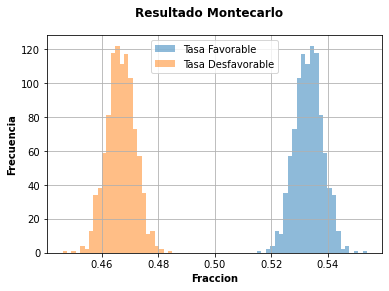

In [7]:
plt.figure()
plt.suptitle('Resultado Montecarlo',fontweight='bold')
plt.hist(Tasa_F,25,label='Tasa Favorable',alpha=0.5)
plt.hist(Tasa_D,25,label='Tasa Desfavorable',alpha=0.5)
plt.ylabel('Frecuencia',fontweight='bold')
plt.xlabel('Fraccion',fontweight='bold')
plt.grid(True)
plt.legend()